# 1. 2022 자전거 데이터 합치기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from glob import glob

filepath = 'C:/Users/김나현/about datascience/통계적 기계학습 팀플/서울시_공공_자전거_이용정보(시간대별)_2022년도'
all_path = glob(filepath + '/*.csv')
print(len(all_path))
all_path

In [ ]:
pd.read_csv(all_path[0], encoding = 'cp949').head(2)

In [ ]:
pd.read_csv(all_path[1], encoding = 'cp949').head(2)

In [ ]:
# 12개의 모든 파일의 칼럼명과 순서가 같은지 확인
# 같은 의미를 가지는 칼럼은 동일하게 칼럼명 바꿔주기 위함
all_cols = []

for path in all_path:
    cols = list(pd.read_csv(path, encoding = 'cp949', skiprows = lambda x : x>2).columns)
    
    all_cols += cols
    
set(all_cols)

# 필요한 컬럼인지 판단
- 대여소명과 대여소 번호는 같은거라고 판단하고 대여소명은 제거해줌

In [ ]:
interested = ['대여일자','대여시간','대여소번호','대여구분코드','성별',  '연령대코드',
 '운동량',
 '이용건수',
 '이용시간(분)',
 '탄소량',
 '이동거리(M)']

all_df = pd.DataFrame()

for path in all_path:
    single = pd.read_csv(path, encoding = 'cp949')
    
    all_df = pd.concat([all_df, single[interested]])
    print(all_df.shape)
    
    del single

In [ ]:
all_df.to_csv('2022_01_01to2022_12_31.csv',index = False)

# 2. nan 값 처리하기

In [3]:
all_df = pd.read_csv('2022_01_01to2022_12_31.csv')

In [4]:
all_df.isnull().sum()

대여일자              0
대여시간              0
대여소번호             0
대여구분코드            0
성별         12315127
연령대코드             0
운동량               0
이용건수              0
이용시간(분)           0
탄소량               0
이동거리(M)           0
dtype: int64

In [5]:
all_df.shape

(36160487, 11)

In [6]:
all_df.columns

Index(['대여일자', '대여시간', '대여소번호', '대여구분코드', '성별', '연령대코드', '운동량', '이용건수',
       '이용시간(분)', '탄소량', '이동거리(M)'],
      dtype='object')

# 대여일자
- 변경 X

In [7]:
set(all_df['대여일자'])

{'2022-01-01',
 '2022-01-02',
 '2022-01-03',
 '2022-01-04',
 '2022-01-05',
 '2022-01-06',
 '2022-01-07',
 '2022-01-08',
 '2022-01-09',
 '2022-01-10',
 '2022-01-11',
 '2022-01-12',
 '2022-01-13',
 '2022-01-14',
 '2022-01-15',
 '2022-01-16',
 '2022-01-17',
 '2022-01-18',
 '2022-01-19',
 '2022-01-20',
 '2022-01-21',
 '2022-01-22',
 '2022-01-23',
 '2022-01-24',
 '2022-01-25',
 '2022-01-26',
 '2022-01-27',
 '2022-01-28',
 '2022-01-29',
 '2022-01-30',
 '2022-01-31',
 '2022-02-01',
 '2022-02-02',
 '2022-02-03',
 '2022-02-04',
 '2022-02-05',
 '2022-02-06',
 '2022-02-07',
 '2022-02-08',
 '2022-02-09',
 '2022-02-10',
 '2022-02-11',
 '2022-02-12',
 '2022-02-13',
 '2022-02-14',
 '2022-02-15',
 '2022-02-16',
 '2022-02-17',
 '2022-02-18',
 '2022-02-19',
 '2022-02-20',
 '2022-02-21',
 '2022-02-22',
 '2022-02-23',
 '2022-02-24',
 '2022-02-25',
 '2022-02-26',
 '2022-02-27',
 '2022-02-28',
 '2022-03-01',
 '2022-03-02',
 '2022-03-03',
 '2022-03-04',
 '2022-03-05',
 '2022-03-06',
 '2022-03-07',
 '2022-03-

# 대여시간
- 한자리수와 두자리수가 섞여있어서 모두 두자리수로 만들어줌
-> ex. 5 -> 05

In [8]:
set(all_df['대여시간'])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23}

In [9]:
all_df = all_df.astype({ '대여시간' : 'str' })

In [10]:
all_df['대여시간'] = all_df['대여시간'].apply(lambda x: str('0' + x)[-2:])
set(all_df['대여시간'])

{'00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23'}

In [11]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36160487 entries, 0 to 36160486
Data columns (total 11 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     object 
 2   대여소번호    int64  
 3   대여구분코드   object 
 4   성별       object 
 5   연령대코드    object 
 6   운동량      object 
 7   이용건수     int64  
 8   이용시간(분)  int64  
 9   탄소량      object 
 10  이동거리(M)  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 3.0+ GB


# 대여소번호
- 변경 x

In [12]:
np.unique(all_df['대여소번호'])

array([    3,     5,    10, ..., 88888, 99998, 99999], dtype=int64)

# 대여구분코드
- 일일권과 일일권(비회원)을 같은 종류로 만들어 줌 => type
-> 단체권 : group
-> 일일권, 일일권(비회원) : casual
-> 정기권 : regular

In [13]:
set(all_df['대여구분코드'])

{'단체권', '일일권', '일일권(비회원)', '정기권'}

In [14]:
mapper = {'단체권' : 'group',
           '일일권' : 'casual',
           '일일권(비회원)' : 'casual',
            '정기권' : 'regular'}

all_df['type'] = all_df['대여구분코드'].map(mapper)
set(all_df['type'])

{'casual', 'group', 'regular'}

In [15]:
all_df.columns

Index(['대여일자', '대여시간', '대여소번호', '대여구분코드', '성별', '연령대코드', '운동량', '이용건수',
       '이용시간(분)', '탄소량', '이동거리(M)', 'type'],
      dtype='object')

In [16]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36160487 entries, 0 to 36160486
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     object 
 2   대여소번호    int64  
 3   대여구분코드   object 
 4   성별       object 
 5   연령대코드    object 
 6   운동량      object 
 7   이용건수     int64  
 8   이용시간(분)  int64  
 9   탄소량      object 
 10  이동거리(M)  float64
 11  type     object 
dtypes: float64(1), int64(3), object(8)
memory usage: 3.2+ GB


In [17]:
all_df = all_df.drop(['대여구분코드'], axis = 'columns')

In [18]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36160487 entries, 0 to 36160486
Data columns (total 11 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     object 
 2   대여소번호    int64  
 3   성별       object 
 4   연령대코드    object 
 5   운동량      object 
 6   이용건수     int64  
 7   이용시간(분)  int64  
 8   탄소량      object 
 9   이동거리(M)  float64
 10  type     object 
dtypes: float64(1), int64(3), object(7)
memory usage: 3.0+ GB


# 성별
- 성별 nan값이 너무 많아서 지우는건 무리라고 판단
-> F,f는 F(Female)로 통일
-> M,m 은 M(Male)로 통일
-> nan은 U(Unidentified)로 통일

In [19]:
set(all_df['성별'])

{'F', 'M', 'f', 'm', nan}

In [20]:
mapper = {'F' : 'F',
         'f' : 'F',
         'M' : 'M',
         'm' : 'M',}

all_df['gender'] = all_df['성별'].map(mapper)
set(all_df['gender'])

{'F', 'M', nan}

In [21]:
all_df['gender'].fillna('U', inplace = True)

In [22]:
set(all_df['gender'])

{'F', 'M', 'U'}

In [23]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36160487 entries, 0 to 36160486
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     object 
 2   대여소번호    int64  
 3   성별       object 
 4   연령대코드    object 
 5   운동량      object 
 6   이용건수     int64  
 7   이용시간(분)  int64  
 8   탄소량      object 
 9   이동거리(M)  float64
 10  type     object 
 11  gender   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 3.2+ GB


In [24]:
all_df = all_df.drop(['성별'], axis = 'columns')

In [25]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36160487 entries, 0 to 36160486
Data columns (total 11 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     object 
 2   대여소번호    int64  
 3   연령대코드    object 
 4   운동량      object 
 5   이용건수     int64  
 6   이용시간(분)  int64  
 7   탄소량      object 
 8   이동거리(M)  float64
 9   type     object 
 10  gender   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 3.0+ GB


# 연령대코드
- 매핑 다시 해줌
-> '20대' : '20s',
-> '30대' : '30s',
-> '40대' : '40s',
-> '50대' : '50s',
-> '60대' : '60s',
-> '70대이상' : '70s',
-> '~10대' : '10s'
-> '기타' : 'unknown'

In [ ]:
mapper = {'20대' : '20s',
          '30대' : '30s',
          '40대' : '40s',
          '50대' : '50s',
          '60대' : '60s',
          '70대이상' : '70s',
          '기타' : 'unknown',
          '~10대' : '10s'}

all_df['age'] = all_df['연령대코드'].map(mapper)
all_df.head()

In [27]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36160487 entries, 0 to 36160486
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     object 
 2   대여소번호    int64  
 3   연령대코드    object 
 4   운동량      object 
 5   이용건수     int64  
 6   이용시간(분)  int64  
 7   탄소량      object 
 8   이동거리(M)  float64
 9   type     object 
 10  gender   object 
 11  age      object 
dtypes: float64(1), int64(3), object(8)
memory usage: 3.2+ GB


In [28]:
all_df = all_df.drop(['연령대코드'], axis = 'columns')

In [29]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36160487 entries, 0 to 36160486
Data columns (total 11 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     object 
 2   대여소번호    int64  
 3   운동량      object 
 4   이용건수     int64  
 5   이용시간(분)  int64  
 6   탄소량      object 
 7   이동거리(M)  float64
 8   type     object 
 9   gender   object 
 10  age      object 
dtypes: float64(1), int64(3), object(7)
memory usage: 3.0+ GB


# 운동량
- \\N이라는 이상한 값 포함 => '0.00'으로 바꿔줌
- 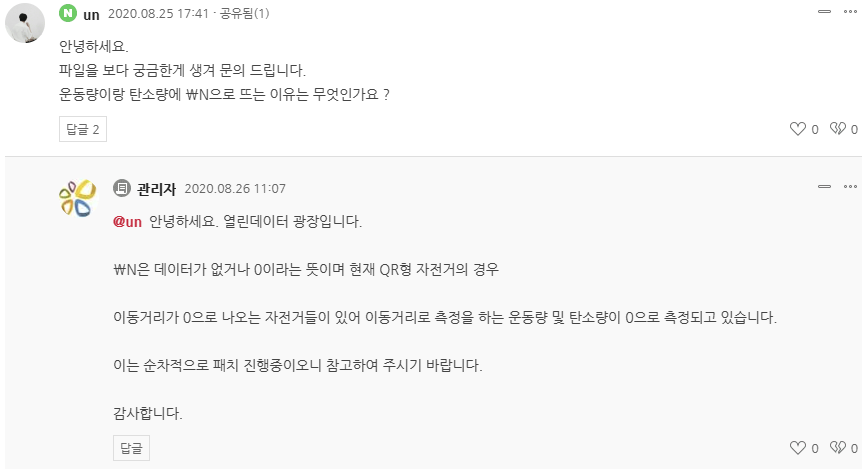

In [30]:
np.unique(all_df['운동량'],return_counts = True)

(array(['-379.95', '0.00', '0.01', ..., '999.99', '99999999.99', '\\N'],
       dtype=object),
 array([      1, 1320884,    5867, ...,       5,      10,  137401],
       dtype=int64))

### 이동거리가 0.0인 row들 운동량 관찰

In [31]:
all_df.head(2)

,대여일자,대여시간,대여소번호,운동량,이용건수,이용시간(분),탄소량,이동거리(M),type,gender,age
0,2022-01-01,00,1725,0.00,1,44,0.00,0.0,regular,U,10s
1,2022-01-01,00,1167,52.51,1,15,0.51,2210.0,regular,U,10s


In [32]:
move_zero = all_df[all_df['이동거리(M)'] == 0.0]

In [33]:
np.unique(move_zero['운동량'], return_counts = True)
# 모든 \\N 값은 이동거리가 0인 경우에 포함된다는 걸 확인
# 그냥 0으로 처리해줌 -> 버리기에는 개수가 너무 많음

(array(['0.00', '\\N'], dtype=object), array([1277813,  137401], dtype=int64))

In [37]:
all_df.replace({'운동량' : {'\\N': '0.00'}}, inplace = True)

In [38]:
np.unique(all_df['운동량'], return_counts = True)

(array(['-379.95', '0.00', '0.01', ..., '999.98', '999.99', '99999999.99'],
       dtype=object),
 array([      1, 1458285,    5867, ...,       1,       5,      10],
       dtype=int64))

# 이용건수
- 대여일자, 대여소, 대여구분코드, 성별, 연령대코드가 모두 일치하는 대여건수를 의미
- 변화 x

In [34]:
set(all_df['이용건수'])

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 34,
 36,
 38}

# 이용시간(분)
- 변화 x

In [36]:
np.unique(all_df['이용시간(분)'])

array([   0,    1,    2, ..., 2559, 2574, 3205], dtype=int64)

# 탄소량
- \\N이라는 이상한 값 포함 => 모두 0으로 

In [40]:
np.unique(all_df['탄소량'], return_counts = True)
# '\\N'

(array(['-3.18', '0.00', '0.01', ..., '97.88', '971.00', '\\N'],
       dtype=object),
 array([      1, 1340706,   48762, ...,       1,       1,  137401],
       dtype=int64))

### 이동거리가 0.0인 row들 탄소량 관찰

In [39]:
np.unique(move_zero['탄소량'], return_counts = True)
# 모든 \\N 값은 이동거리가 0인 경우에 포함된다는 걸 확인
# 그냥 0으로 처리해줌 -> 버리기에는 개수가 너무 많음

(array(['0.00', '\\N'], dtype=object), array([1277813,  137401], dtype=int64))

In [40]:
all_df.replace({'탄소량' : {'\\N': '0.00'}}, inplace = True)

In [41]:
np.unique(all_df['탄소량'], return_counts = True)

(array(['-3.18', '0.00', '0.01', ..., '94.16', '97.88', '971.00'],
       dtype=object),
 array([      1, 1478107,   48762, ...,       1,       1,       1],
       dtype=int64))

# 이동거리(M)
- 변화 x

In [43]:
np.unique(all_df['이동거리(M)'], return_counts = True)

(array([-1.37067800e+04,  0.00000000e+00,  1.00000000e-01, ...,
         1.31747916e+07,  1.31791590e+07,  1.41102791e+07]),
 array([      1, 1415214,   14069, ...,       1,       1,       1],
       dtype=int64))

# 저장

In [44]:
all_df.to_csv('임시nan값처리.csv',index = False)

# 3. datetime 컬럼 만들기

In [ ]:
all_df = pd.read_csv('임시nan값처리.csv')

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36160487 entries, 0 to 36160486
Data columns (total 11 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     int64  
 2   대여소번호    int64  
 3   운동량      float64
 4   이용건수     int64  
 5   이용시간(분)  int64  
 6   탄소량      float64
 7   이동거리(M)  float64
 8   type     object 
 9   gender   object 
 10  age      object 
dtypes: float64(3), int64(4), object(4)
memory usage: 3.0+ GB


In [ ]:
all_df = all_df.astype({ '대여시간' : 'str' })

In [ ]:
all_df['datetime'] = all_df['대여일자'] + ' ' + all_df['대여시간'] + ':00:00'
all_df['datetime']

0            2022-01-01 0:00:00
1            2022-01-01 0:00:00
2            2022-01-01 0:00:00
3            2022-01-01 0:00:00
4            2022-01-01 0:00:00
                   ...         
36160482    2022-12-31 23:00:00
36160483    2022-12-31 23:00:00
36160484    2022-12-31 23:00:00
36160485    2022-12-31 23:00:00
36160486    2022-12-31 23:00:00
Name: datetime, Length: 36160487, dtype: object

In [ ]:
all_df.drop(['대여일자', '대여시간'], axis = 'columns', inplace = True)

In [ ]:
all_df

,대여소번호,운동량,이용건수,이용시간(분),탄소량,이동거리(M),type,gender,age,datetime
0,1725,0.00,1,44,0.00,0.00,regular,U,10s,2022-01-01 0:00:00
1,1167,52.51,1,15,0.51,2210.00,regular,U,10s,2022-01-01 0:00:00
2,1059,25.66,1,4,0.25,1080.00,regular,U,10s,2022-01-01 0:00:00
3,3794,49.61,1,15,0.50,2160.00,regular,U,10s,2022-01-01 0:00:00
4,4014,23.60,1,7,0.22,961.30,regular,U,10s,2022-01-01 0:00:00
...,...,...,...,...,...,...,...,...,...,...
36160482,262,29.15,1,5,0.21,920.00,regular,M,unknow,2022-12-31 23:00:00
36160483,201,15.36,1,3,0.10,430.88,regular,M,unknow,2022-12-31 23:00:00
36160484,1008,36.83,1,7,0.29,1240.00,regular,M,unknow,2022-12-31 23:00:00
36160485,1637,222.14,1,87,2.00,8630.00,regular,M,unknow,2022-12-31 23:00:00


In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36160487 entries, 0 to 36160486
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   대여소번호     int64  
 1   운동량       float64
 2   이용건수      int64  
 3   이용시간(분)   int64  
 4   탄소량       float64
 5   이동거리(M)   float64
 6   type      object 
 7   gender    object 
 8   age       object 
 9   datetime  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 2.7+ GB


In [ ]:
all_df.to_csv('임시nan값처리2.csv', index = False)

# 4. 날씨 크롤링

In [ ]:
url = 'https://freemeteo.co.uk/weather/seoul/history/daily-history/?gid=1835848&station=10565&date='
date = '2022-01-01'
end = '&language=english&country=south-korea'

In [ ]:
url + date + end

In [ ]:
one_page = pd.read_html(url + date + end)
one_page

In [ ]:
one_page[6]

In [ ]:
# 달 리스트 만들기
mon = []
for month in range(1,13):
    mon.append(month)

mon = list(map(str, mon))

mont = []

for i in range (len(mon)):
    mont.append('0' +mon[i])

month = []    
for i in range (len(mon)):
    month.append(mont[i][-2:])
    
month

In [ ]:
# 일 리스트 만들기
d = []
for i in range(1,32):
    d.append(i)

d = list(map(str, d))

da = []

for i in range (len(d)):
    da.append('0' +d[i])

day = []    
for i in range (len(d)):
    day.append(da[i][-2:])
    
day

In [ ]:
date = []

for m in month:
    for d in day:
        date.append('2022-'+ m + '-' + d)

In [ ]:
remove_date = ['2022-02-29','2022-02-30','2022-02-31',
            '2022-04-31','2022-06-31' ,'2022-09-31',
            '2022-11-31']
for i in remove_date:
    date.remove(i)

In [ ]:
url = 'https://freemeteo.co.uk/weather/seoul/history/daily-history/?gid=1835848&station=10565&date='
end = '&language=english&country=south-korea'

seoul_weather = []

for d in date:
    html_list = pd.read_html(url + d + end)
    seoul_weather.append(html_list[6])

In [ ]:
for i, d in enumerate(date):
        seoul_weather[i]['date'] = d

In [ ]:
all_df = pd.DataFrame()

for i in seoul_weather:
    all_df = pd.concat([all_df, i])
    print(all_df.shape)

In [ ]:
all_df.to_csv('weather_2022_01_01to2022_12_31.csv',index = False)

# 5. weather_modify.csv 제작

In [ ]:
all_df = pd.read_csv('임시nan값처리2.csv')
all_weather = pd.read_csv('weather_2022_01_01to2022_12_31.csv')

In [ ]:
set(all_weather['Time'].apply(lambda x : len(x)))

In [ ]:
set(all_weather['Time'].apply(lambda x : x[:2]))

In [ ]:
set(weather['Time'].apply(lambda x : x[2:]))

In [ ]:
set(all_df['datetime'].apply(lambda x : x[11:]))

In [ ]:
all_weather['Time'] = all_weather['Time'].apply(lambda x: x[:2])
all_weather['datetime'] = all_weather['date']+ ' ' + all_weather['Time'] + ':00:00'
all_weather.head()

In [ ]:
all_weather.drop(['Time', 'date'], axis = 'columns', inplace = True)

In [ ]:
all_weather.isnull().sum()
# Wind Gust,Icon 버리기

# Relative Temperature, Pressure 은 버릴거임

In [ ]:
# all_weather.drop(['Wind Gust', 'Icon'], axis = 'columns', inplace = True)
all_weather.drop(['Relative Temperature', 'Pressure'], axis = 'columns', inplace = True)

In [ ]:
all_weather
# Temperature,  'Wind''Rel. humidity(습도), 'Dew Point(이슬점)', 은
# °C,mb같은 단위가 붙어있어서 수치형이 아님. 숫자로 바꿔주겠다.

In [ ]:
set(all_weather['Temperature'].apply(lambda x : x[-2:]))

In [ ]:
set(all_weather['Dew Point'].apply(lambda x : x[-2:]))

In [ ]:
all_weather['temp'] = all_weather['Temperature'].apply(lambda x : int(x[:-2]))
all_weather['dew'] = all_weather['Dew Point'].apply(lambda x: int(x[:-2]))
all_weather.head()
# °C 빼주기

In [ ]:
# 빼주기 전에 모든 row 에 대해 %가 붙어있는지 확인
set(all_weather['Rel. humidity'].apply(lambda x: x[-1:]))

In [ ]:
all_weather['humid'] = all_weather['Rel. humidity'].apply(lambda x : int(x[:-1]))
all_weather.head()

In [ ]:
# Wind에서 150°9 Km/h가 있으면 150°이 풍향 9가 풍속
# 바람은 이동하는데, 풍향과 풍속이 있음
# 만약에 자전거를 이용하는 고객이 한 방향으로 이동한다면, 풍향이 아주 큰 의미가 있을 것임
# 하지만 자전거를 타고 움직이는 방향은 천차만별임 -> 풍향은 현재 의미가 없음

# 풍속만 뽑기

set(all_weather['Wind'])

In [ ]:
all_weather['Wind'] = all_weather['Wind'].apply(lambda x : x.replace('Calm' , '000°0 Km/h'))
set(all_weather['Wind'].apply(lambda x : x[-4:]) )

In [ ]:
all_weather['windspeed'] = all_weather['Wind'].apply(lambda x : int(x.split('°')[1].split('Km/h')[0]))

In [ ]:
interested = ['datetime', 'temp', 'dew', 'humid', 'windspeed']
all_weather[interested].to_csv('weather_modify.csv', index = False)

# 6. 미세먼지 포함 csv 파일 만들기

In [ ]:
mon = pd.read_csv("C:/Users/김나현/Downloads/서울시 대기질 자료 제공_2022 (1).csv")

In [ ]:
set(np.unique(mon['Unnamed: 0'], return_counts = True)[1])

In [ ]:
mon.drop(labels ='Unnamed: 0', axis = 'columns', inplace = True)

In [ ]:
df = pd.read_csv('weather_modify.csv')

In [ ]:
set(np.unique(df['datetime'], return_counts = True)[1])

In [ ]:
df['count'] = 1

In [ ]:
df1 = df.groupby(['datetime']).agg({'count': np.sum})

In [ ]:
df1.reset_index(inplace = True)

In [ ]:
df1[df1['count'] !=1]
## 크롤링해온 날씨 데이터에서 같은 시간대에 row가 2개 이상인 시간이 존재 
# 확인 결과 5:00, 5:33 와 같이 시는 동일하나 분이 다른 데이터임을 확인
# -> count가 2 이상인 datetime은 첫 번째 날씨만 사용하기로 결정

In [ ]:
np.sum(df1[df1['count'] !=1]['count'])

In [ ]:
wrong_list = df1[df1['count'] !=1]['datetime'].to_list()

In [ ]:
df2 = pd.DataFrame()

for i in wrong_list:
    df2 = pd.concat([df2, df[df['datetime'] == i].head(1)])

In [ ]:
df = df.drop_duplicates(subset = 'datetime', keep = 'first')
df = df.reset_index(drop = True)

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
min_time = df['datetime'].min()
max_time = df['datetime'].max()
hour_time = pd.date_range(start = min_time, end = max_time, freq = '1H')
# missing_time = [time for time in hour_time if time not in df['datetime']]
# missing_time

In [ ]:
time = []
res = []
for i in hour_time:
    time.append(i)

for i in range (len(time)):
    res.append(time[i].to_pydatetime().strftime("%Y-%m-%d %H:%M:%S"))
    
res  # 2022-01-01부터 12-31까지 한시간 단위로 모두 있는 리스트

In [ ]:
myres = []
for i in range (len(df['datetime'])):
    myres.append(df['datetime'].tolist()[i].strftime("%Y-%m-%d %H:%M:%S"))

In [ ]:
missing_dates = set(res).difference(set(myres))
len(missing_dates)

In [ ]:
all_date = pd.DataFrame({'datetime' : res})

In [ ]:
all_date['datetime'] = pd.to_datetime(all_date['datetime'])

In [ ]:
include_nan = pd.merge(all_date, df, how = 'outer')
include_nan # 날씨 사이트에 없는 시간까지 포함해서 2022년 모든 시간에 대한 데이터프레임

In [ ]:
# 시간을 기준으로 날씨 변화를 측정한 정보이므로 1시간내에 날씨가 드라마틱하게 변하진 않을것이라고 가정하고
# 위 아래 row의  보간법으로 nan값을 채워주겠다
# include_nan.isnull().sum()
include_nan['temp'] = include_nan['temp'].interpolate(method = 'linear')
include_nan['dew'] = include_nan['dew'].interpolate(method = 'linear')
include_nan['humid'] = include_nan['humid'].interpolate(method = 'linear')
include_nan['windspeed'] = include_nan['windspeed'].interpolate(method = 'linear')
include_nan.drop('count', axis = 'columns', inplace = True)

In [ ]:
final = pd.concat([include_nan, mon], axis = 1)
final.to_csv('weather_modify_미세먼지포함.csv', index = False)

# 7. 미세먼지 포함 csv 수정 파일 제작

In [ ]:
df = pd.read_csv('weather_modify_미세먼지포함.csv')

windspeed(Beaufort wind force (바람의 영향))

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=woolalra&logNo=100194954677

- 5계급 정도가 바람이 사람의 행동에 영향을 주는 기준으로 내가 판단했다.만약 갖고 있는 데이터의 바람세기가 5계급 미만이면 바람이 사람의 행동에 제약을 준다고 말하기 힘들것이다 -> 일단 바람의 분포를 확인해보자

In [ ]:
df['windspeed'].hist()
# y축은 row 의 수 , x축은 바람의 세기
# 5 계급이 바람의 세기 29부터인데 29를 넘는게 몇개 없는걸 확인할 수 있다 -> 있긴 있음

In [ ]:
# 바람의 세기가 사람에 영향을 주는 지점(29 이상) 이상일 때, 
# 바람에게 영향을 받았다고 가정
df['windforce'] = 0
df.loc[df['windspeed'] >= 29, 'windforce'] = 1
df.head()

불쾌지수 (humidex)
- T 공기는 °C 단위의 공기 온도입니다.
- T이슬은 이슬점 온도 (° C)입니다.
- e = 2.71828은 오일러 수의 근사치입니다. https://en.wikipedia.org/wiki/Humidex

In [ ]:
# 불쾌지수는 온도(temp)와 이슬점(dew)을 이용해 땀이 증발하는 속도를 계산해 알아냄 
def humidex_cal(T, Td):
    upper = 5417.7530*(1/273.16 - 1/(273.15+Td))
    inner = 6.11 * (2.71828 **upper)
    return  T + 0.5555*(inner - 10)

In [ ]:
humidex_cal(df['temp'], df['dew'])

In [ ]:
df['humidex'] = humidex_cal(df['temp'], df['dew'])
df.head()

In [ ]:
# humidex 에 따라서 느끼는 불쾌감을 따로 칼럼을 만들기
df['discomfort'] = 0
df.loc[df['humidex'] >= 30, 'discomfort'] = 1
df.loc[df['humidex'] >= 40, 'discomfort'] = 2
df.loc[df['humidex'] >= 46, 'discomfort'] = 3
df.head()
# 숫자가 올라갈수록 불쾌

열지수

In [ ]:
def HI_cal(T,RH):
    HI = -42.379 + 2.04901523*T + 10.14333127*RH - .22475541*T*RH - .00683783*T*T - .05481717*RH*RH + .00122874*T*T*RH + .00085282*T*RH*RH - .00000199*T*T*RH*RH
    return HI

# T는 화씨

In [ ]:
df['화씨'] = df['temp'] *(9/5) + 32

In [ ]:
df['HI_화씨'] = HI_cal(df['화씨'], df['humid'])

In [ ]:
df['HI_섭씨'] = (5/9)*(df['HI_화씨'] - 32)

In [ ]:
df.drop('HI', axis = 'columns',inplace = True)

In [ ]:
set(df['HI_섭씨'])

# 일단 HI계산은 다음으로 미루기

날씨 데이터랑 자전거 이용 데이터 합치기

In [ ]:
rcg = pd.read_csv('datetime_regular_casual_group.csv')
rcg

In [ ]:
pd.merge(rcg, df).sort_values(by = 'datetime').to_csv('datetime_rcg_weather.csv', index = False)

In [ ]:
df = pd.read_csv('datetime_rcg_weather.csv')

In [ ]:
parsed = df['datetime'].apply(lambda x : pd.to_datetime(x))
parsed

In [ ]:
df['year'] = parsed.apply(lambda x : x.year)
df['month'] = parsed.apply(lambda x : x.month)
df['day'] = parsed.apply(lambda x : x.day)
df['hour'] = parsed.apply(lambda x : x.hour)
df['dayofweek'] = parsed.apply(lambda x : x.dayofweek)
df.head()


In [ ]:
interested = ['datetime', 'regular', 'casual', 'group', 'temp', 'dew', 'humid',
       'windspeed', 'windforce', 'humidex', 'discomfort','미세먼지(PM10)','초미세먼지(PM2.5)', 'year', 'month',
       'day', 'hour', 'dayofweek']
df[interested].to_csv('datettime_rcg_weather_dayofweek(미세먼지포함).csv', index = False)

# 8.datettime_rcg_weather_dayofweek.csv 분석 파일(EDA)

In [ ]:
df = pd.read_csv('datettime_rcg_weather_dayofweek(미세먼지포함).csv')

In [ ]:
interested = ['year', 'month','day', 'hour', 'dayofweek'
            ,'regular', 'casual', 'group',
             'windforce','discomfort','미세먼지(PM10)',
       '초미세먼지(PM2.5)'
             ]
df = df[interested]

In [ ]:
sns.countplot(df['windforce'])

In [ ]:
sns.countplot(df['discomfort'])
# 숫자가 올라갈수록 불쾌

In [ ]:
sns.pointplot(data = df, x = 'month', y = 'regular')
# 겨울에 이용량이 적고, 엄청 더울 때에도 이용량이 감소한다.

In [ ]:
sns.pointplot(data = df, x = 'month', y = 'casual')

In [ ]:
sns.pointplot(data = df, x = 'month', y = 'group')

In [ ]:
sns.pointplot(data = df, x = 'day', y = 'regular')

In [ ]:
sns.pointplot(data = df, x = 'day', y = 'casual')

In [ ]:
sns.pointplot(data = df, x = 'day', y = 'group')

In [ ]:
sns.pointplot(data = df, x = 'hour', y = 'regular')

In [ ]:
sns.pointplot(data = df, x = 'hour', y = 'casual')

In [ ]:
sns.pointplot(data = df, x = 'hour', y = 'group')

In [ ]:
sns.pointplot(data = df, x = 'dayofweek', y = 'regular')

In [ ]:
sns.pointplot(data = df, x = 'dayofweek', y = 'casual')

In [ ]:
sns.pointplot(data = df, x = 'dayofweek', y = 'group')

windforce & type
- 바람세기 (0: 바람이 영향을 줄만큼 세지 않음, 1: 영향을 줄만큼 셈)

In [ ]:
sns.barplot(data = df, x = 'windforce', y = 'regular')

In [ ]:
sns.barplot(data = df, x = 'windforce', y = 'casual')

In [ ]:
sns.barplot(data = df, x = 'windforce', y = 'group')

In [ ]:
# 그래프를 하나씩 그리다 보면 보기가 까다로울 수 있다. -> 한번에 보기 가능
fig, ((ax1, ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))= plt.subplots(nrows = 3, ncols = 3,constrained_layout = True)   

fig.set_size_inches(16,8)   # fig의 크기 조절

sns.lineplot(data = df, x = 'month', y = 'regular',ax = ax1 )
sns.lineplot(data = df, x = 'month', y = 'casual',ax = ax2 )
sns.lineplot(data = df, x = 'month', y = 'group',ax = ax3 )
sns.lineplot(data = df, x = 'day', y = 'regular',ax = ax4 )
sns.lineplot(data = df, x = 'day', y = 'casual',ax = ax5 )
sns.lineplot(data = df, x = 'day', y = 'group',ax = ax6 )
sns.lineplot(data = df, x = 'hour', y = 'regular',ax = ax7 )
sns.lineplot(data = df, x = 'hour', y = 'casual',ax = ax8 )
sns.lineplot(data = df, x = 'hour', y = 'group',ax = ax9 )

In [ ]:
fig,((ax10,ax11,ax12), (ax13,ax14,ax15),(ax16,ax17,ax18))= plt.subplots(nrows = 3, ncols = 3, constrained_layout = True)   
fig.set_size_inches(16,8)
# fig.tight_layout()

sns.lineplot(data = df, x = 'dayofweek', y = 'regular',ax = ax10 )
sns.lineplot(data = df, x = 'dayofweek', y = 'casual',ax = ax11 )
sns.lineplot(data = df, x = 'dayofweek', y = 'group',ax = ax12 )
sns.barplot(data = df, x = 'windforce', y = 'regular',ax = ax13 )
sns.barplot(data = df, x = 'windforce', y = 'casual',ax = ax14 )
sns.barplot(data = df, x = 'windforce', y = 'group',ax = ax15 )
sns.lineplot(data = df, x = 'discomfort', y = 'regular',ax = ax16 )
sns.lineplot(data = df, x = 'discomfort', y = 'casual',ax = ax17 )
sns.lineplot(data = df, x = 'discomfort', y = 'group',ax = ax18 )

미세먼지
https://blog.naver.com/kopajago/223047035108 -좋음, 보통, 나쁨, 매우나쁨으로 구분해서 새로운 칼럼 제작

In [ ]:
# 미세먼지 농도에 따라 구분 기준 
df['PM10 classification'] = 'good'  # 좋음
df.loc[df['미세먼지(PM10)'] > 30, 'PM10 classification'] = 'average'  # 보통
df.loc[df['미세먼지(PM10)'] > 80, 'PM10 classification'] = 'bad'  # 나쁨
df.loc[df['미세먼지(PM10)'] > 150, 'PM10 classification'] = 'very bad'  # 매우 나쁨
df.head()

In [ ]:
sns.pointplot(data = df, x = 'PM10 classification', y = 'regular')

초미세먼지
https://blog.naver.com/kopajago/223047035108 -좋음, 보통, 나쁨, 매우나쁨으로 구분해서 새로운 칼럼 제작

In [ ]:
# 초미세먼지 농도에 따라 구분 기준 
df['PM2.5 classification'] = 'good'  # 좋음
df.loc[df['초미세먼지(PM2.5)'] > 15, 'PM2.5 classification'] = 'average'  # 보통
df.loc[df['초미세먼지(PM2.5)'] > 35, 'PM2.5 classification'] = 'bad'  # 나쁨
df.loc[df['초미세먼지(PM2.5)'] > 75, 'PM2.5 classification'] = 'very bad'  # 매우 나쁨
df.head()

In [ ]:
sns.pointplot(data = df, x = 'PM2.5 classification', y = 'regular')

# 9. EDA 준비

In [ ]:
all_df = pd.read_csv('임시nan값처리2.csv')
all_weather = pd.read_csv('weather_modify.csv')

In [ ]:
all_df['date_trash'] = all_df['datetime'].apply(lambda x : x[11:])
all_df['date_trash'] = all_df['date_trash'].apply(lambda x : '0' + x)
all_df['date_trash'] = all_df['date_trash'].apply(lambda x : x[-8:])
all_df['day_trash'] = all_df['datetime'].apply(lambda x : x[:10])

In [ ]:
all_df['datetime'] = all_df['day_trash'] + ' ' + all_df['date_trash']

In [ ]:
all_df.drop(['date_trash', 'day_trash'],axis = 'columns', inplace = True)

In [ ]:
interested = ['type','gender', 'age', 'datetime']
df = all_df[interested]
df

In [ ]:
df.to_csv('type_gender_age_datetime.csv',index = False)

# 10. datetime_type_gender_age_count(datetime_regular_casual_group.csv만든 파일)

In [ ]:
df = pd.read_csv('type_gender_age_datetime.csv')

In [ ]:
df['count'] = 1
df.groupby('datetime').agg({'count' : np.sum})
# 해당 시간대에서 이용한 이용객 수

In [ ]:
reg = df.loc[df['type'] == 'regular']
reg = reg.groupby('datetime').agg({'count':np.sum}).reset_index()
reg.columns = ['datetime', 'regular']
reg
# 정기권 고객들의 시간대별 이용량을 구할 수 있음

In [ ]:
cas = df.loc[df['type'] == 'casual']
cas = cas.groupby('datetime').agg({'count':np.sum}).reset_index()
cas.columns = ['datetime', 'casual']
cas
# 일일권 고객들의 시간대별 이용량을 구할 수 있음

In [ ]:
gro = df.loc[df['type'] == 'group']
gro = gro.groupby('datetime').agg({'count':np.sum}).reset_index()
gro.columns = ['datetime', 'group']
gro
# 단체권 고객들의 시간대별 이용량을 구할 수 있음

In [ ]:
# reg 와 cas를 합치기 -> 두개의 공통 칼럼인 datetime을 기준으로 합쳐짐
rc = pd.merge(reg, cas, how = 'outer')
rc

In [ ]:
rcg = pd.merge(rc, gro, how = 'outer')
rcg
# gro도 합쳐주기

In [ ]:
# 데이터 프레임을 합치는 과정에서 생긴 NaN을 0으로 채워주기(NaN은 연산이 안되니까)
rcg = rcg.fillna(0)
rcg
# 시간대별 고객의 유형별 이용량을 확인할 수 있음

In [ ]:
rcg.to_csv('datetime_regular_casual_group.csv', index = False)

# 11. gender,age까지 포함해서 EDA

In [ ]:
all_df = pd.read_csv('type_gender_age_datetime.csv')
all_df

In [ ]:
all_df = all_df.fillna('70s')

In [ ]:
all_df['count'] = 1
gender_type = all_df.groupby(['gender','type']).agg({'count': np.sum})

In [ ]:
gender_type.reset_index(inplace = True)

In [ ]:
fig,((ax10,ax11,ax12))= plt.subplots(nrows = 1, ncols = 3, constrained_layout = True)   
fig.set_size_inches(10,3)

sns.barplot(data = gender_type[gender_type['gender'] == 'F'], x = 'type', y = 'count',ax = ax10).set_title('Female type ')
sns.barplot(data = gender_type[gender_type['gender'] == 'M'], x = 'type', y = 'count', ax = ax11).set_title('Male type ')
sns.barplot(data = gender_type[gender_type['gender'] == 'U'], x = 'type', y = 'count', ax = ax12)
plt.title('Unidentified type ')

In [ ]:
fig,((ax10,ax11,ax12))= plt.subplots(nrows = 1, ncols = 3, constrained_layout = True)   
fig.set_size_inches(10,3)

sns.barplot(data = gender_type[gender_type['type'] == 'regular'], x = 'gender', y = 'count',ax = ax10).set_title('regular type ')
sns.barplot(data = gender_type[gender_type['type'] == 'casual'], x = 'gender', y = 'count', ax = ax11).set_title('casual type ')
sns.barplot(data = gender_type[gender_type['type'] == 'group'], x = 'gender', y = 'count', ax = ax12).set_title('group type ')

In [ ]:
age_type = all_df.groupby(['age','type']).agg({'count': np.sum})
age_type.reset_index(inplace = True)

In [ ]:
fig,((ax10,ax11,ax12),(ax13,ax14,ax15),(ax16,ax17,ax18))= plt.subplots(nrows = 3, ncols = 3)   
fig.set_size_inches(16,8)

sns.barplot(data = age_type[age_type['age'] == '10s'], x = 'type', y = 'count',ax = ax10).set_title('10s type ')
sns.barplot(data = age_type[age_type['age'] == '20s'], x = 'type', y = 'count',ax = ax11).set_title('20s type ')
sns.barplot(data = age_type[age_type['age'] == '30s'], x = 'type', y = 'count',ax = ax12).set_title('30s type ')
sns.barplot(data = age_type[age_type['age'] == '40s'], x = 'type', y = 'count',ax = ax13).set_title('40s type ')
sns.barplot(data = age_type[age_type['age'] == '50s'], x = 'type', y = 'count',ax = ax14).set_title('50s type ')
sns.barplot(data = age_type[age_type['age'] == '60s'], x = 'type', y = 'count',ax = ax15).set_title('60s type ')
sns.barplot(data = age_type[age_type['age'] == '70s'], x = 'type', y = 'count',ax = ax16).set_title('70s type ')
sns.barplot(data = age_type[age_type['age'] == 'unknown'], x = 'type', y = 'count',ax = ax17).set_title('unknown type ')

In [ ]:
fig,((ax1,ax2,ax3))= plt.subplots(nrows = 1, ncols = 3)   
fig.set_size_inches(16,3)

sns.barplot(data = age_type[age_type['type'] == 'regular'], x = 'age', y = 'count',ax = ax1).set_title('regular age')
sns.barplot(data = age_type[age_type['type'] == 'casual'], x = 'age', y = 'count',ax = ax2).set_title('casual age')
sns.barplot(data = age_type[age_type['type'] == 'group'], x = 'age', y = 'count',ax = ax3).set_title('group age')